In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os, sys
import seaborn as sns
from scipy.stats import pearsonr
import mdtraj as md 
import numpy as np 
import os, sys 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colorbar import ColorbarBase

In [2]:
def source_module(module_file: str, local_module_name: str = None):
    import importlib
    """to add a module from a user defined python script into the local name space"""
    if local_module_name is None:
        local_module_name = module_file.split("/")[-1].replace(".py", "")
    if len(module_file.split("/")) == 1 or module_file.split("/")[-2] == ".":
        module_dir = os.getcwd()
    else:
        module_dir = "/".join(module_file.split("/")[:-1])
    sys.path.insert(0, module_dir)
    module = importlib.import_module(module_file.split("/")[-1].replace(".py", ""))
    g = globals()
    g[local_module_name] = module
    pass

# importing a python script where I keep a lot of the basic functions I use!
source_module("/Users/anjalidhar/Desktop/Packages/mdtools.py")
source_module("/Users/anjalidhar/Desktop/Packages/Writhe_Package/package/visualize/visualize.py")

from visualize import palettes
labels = mdtools.load_dict(f'/Users/anjalidhar/Desktop/Packages/run_label_dict')

### loading

In [ ]:
docking_scores = {}
score_dir = '/Users/anjalidhar/Desktop/docking_paper/github/data/docking_scores' 
runs = ['41on41bf', '47on47bf', '41onapo', '47onapo', '23onapo']
for d in ['AD', 'DD']:
    docking_scores[d]={}
    for run in runs: 
        docking_scores[d][run] = np.load(f'/Users/anjalidhar/Desktop/docking_paper/github/data/docking_scores/{d}_{run}.npy')

In [ ]:
# 23bf is gross bc the frame #s are not homogenous; we cannot stack them 
for d in ['AD', 'DD']:
    docking_scores[d]['23on23bf'] = []
    for i in range(20):
        s = np.load(f'/Users/anjalidhar/Desktop/docking_paper/github/data/docking_scores/{d}_23on23bf/c_{i}.npy')
        docking_scores[d]['23on23bf'].append(s)

### AD vs DD, 41 vs 47 ###
normalized too 

In [13]:
def min_max_norm(data, min_val, max_val):
    return (data - min_val) / (max_val - min_val)

In [14]:
def std_err(score):
    return np.std(score)/np.sqrt(score.shape[0])

fasudil:
 stdev = 0.11804709320022047
 sterr = 0.0008343019542708604
 uncert = 0.0016080266743127446
ligand 47:
 stdev = 0.11758639516944902
 sterr = 0.0008310459548473977
 uncert = 0.0016137281046804562
ligand 23:
 stdev = 0.09085478835420176
 sterr = 0.0007659506204792613
 uncert = 0.001502512940564063


/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


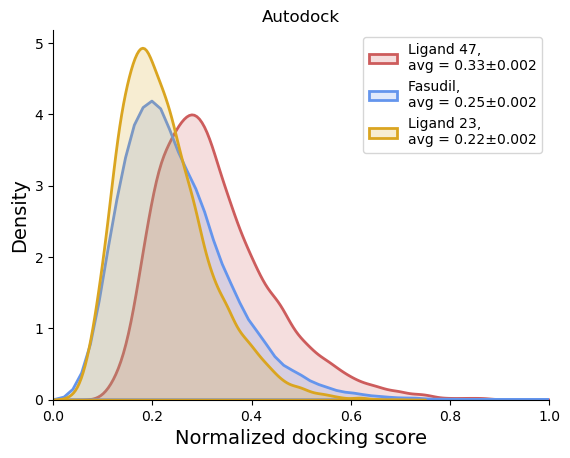

In [19]:
# AUTODOCK VINA
import seaborn as sns
import matplotlib.pyplot as plt

fas = -docking_scores['AD']['41on41bf'].flatten()
lig47 = -docking_scores['AD']['47on47bf'].flatten()
lig23 = -np.concatenate(docking_scores['AD']['23on23bf'])

comb_max = np.max([np.max(x) for x in [fas, lig47, lig23]])
comb_min = np.min([np.min(x) for x in [fas, lig47, lig23]])

clip_min = 0
clip_max = 9

# Clip the values
comb_min = np.clip(comb_min, clip_min, clip_max)
comb_max = np.clip(comb_max, clip_min, clip_max)

norm_fas = min_max_norm(fas, comb_min, comb_max)
norm_uncert_fas = uncertainties['AD']['41on41bf']/(comb_max-comb_min)

print("fasudil:")
print(f' stdev = {norm_fas.std()}')
print(f' sterr = {std_err(norm_fas)}')
print(f' uncert = {norm_uncert_fas[0]}')


norm_lig47 = min_max_norm(lig47, comb_min, comb_max)
norm_uncert_47 = uncertainties['AD']['47on47bf']/(comb_max-comb_min)

print("ligand 47:")
print(f' stdev = {norm_lig47.std()}')
print(f' sterr = {std_err(norm_lig47)}')
print(f' uncert = {norm_uncert_47[0]}')


norm_lig23 = min_max_norm(lig23, comb_min, comb_max)
norm_uncert_23 = uncertainties['AD']['23on23bf']/(comb_max-comb_min)

print("ligand 23:")
print(f' stdev = {norm_lig23.std()}')
print(f' sterr = {std_err(norm_lig23)}')
print(f' uncert = {norm_uncert_23[0]}')

plt.figure()
sns.kdeplot(norm_lig47.flatten(), color='indianred',  fill=True, alpha=0.2, lw=2,  
            label=f'Ligand 47, \navg = {np.mean(norm_lig47):.2f}±{norm_uncert_47[0]:.3f}') #, RMSD<3 ang = {return_lim_count(ad.flatten(), 3)}')
sns.kdeplot(norm_fas.flatten(), color='cornflowerblue', fill=True, alpha=0.2, lw=2, 
            label=f'Fasudil, \navg = {np.mean(norm_fas):.2f}±{norm_uncert_fas[0]:.3f}')#, RMSD<3 ang = {return_lim_count(dd.flatten(), 3)}')
sns.kdeplot(norm_lig23, color='goldenrod', fill=True, alpha=0.2, lw=2, 
            label=f'Ligand 23, \navg = {np.mean(norm_lig23):.2f}±{norm_uncert_23[0]:.3f}')#, RMSD<3 ang = {return_lim_count(dd.flatten(), 3)}')


plt.title('Autodock')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel("Density", fontsize=14)
plt.xlabel('Normalized docking score', fontsize=14)
plt.xlim([0, 1])
#plt.ylim([0, 0.07])
plt.legend()
plt.savefig(f'/Users/anjalidhar/Desktop/score_AD.png', dpi=300, bbox_inches='tight')

/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


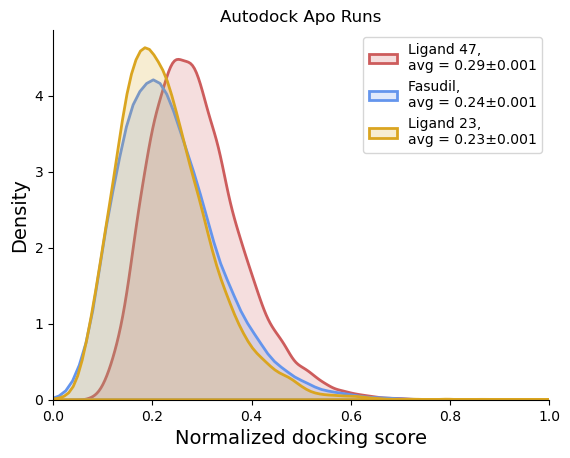

In [43]:
# AUTODOCK VINA
import seaborn as sns
import matplotlib.pyplot as plt

fas = -docking_scores['AD']['41onapo'].flatten()
lig47 = -docking_scores['AD']['47onapo'].flatten()
lig23 = -np.concatenate(docking_scores['AD']['23onapo'])

comb_max = np.max([np.max(x) for x in [fas, lig47, lig23]])
comb_min = np.min([np.min(x) for x in [fas, lig47, lig23]])

clip_min = 0
clip_max = 9

# Clip the values
comb_min = np.clip(comb_min, clip_min, clip_max)
comb_max = np.clip(comb_max, clip_min, clip_max)

norm_fas = min_max_norm(fas, comb_min, comb_max)
norm_uncert_fas = uncertainties['AD']['41onapo']/(comb_max-comb_min)
norm_lig47 = min_max_norm(lig47, comb_min, comb_max)
norm_uncert_47 = uncertainties['AD']['47onapo']/(comb_max-comb_min)
norm_lig23 = min_max_norm(lig23, comb_min, comb_max)
norm_uncert_23 = uncertainties['AD']['23onapo']/(comb_max-comb_min)

plt.figure()
sns.kdeplot(norm_lig47.flatten(), color='indianred',  fill=True, alpha=0.2, lw=2,  
            label=f'Ligand 47, \navg = {np.mean(norm_lig47):.2f}±{norm_uncert_47[0]:.3f}') #, RMSD<3 ang = {return_lim_count(ad.flatten(), 3)}')
sns.kdeplot(norm_fas.flatten(), color='cornflowerblue', fill=True, alpha=0.2, lw=2, 
            label=f'Fasudil, \navg = {np.mean(norm_fas):.2f}±{norm_uncert_fas[0]:.3f}')#, RMSD<3 ang = {return_lim_count(dd.flatten(), 3)}')
sns.kdeplot(norm_lig23, color='goldenrod', fill=True, alpha=0.2, lw=2, 
            label=f'Ligand 23, \navg = {np.mean(norm_lig23):.2f}±{norm_uncert_23[0]:.3f}')#, RMSD<3 ang = {return_lim_count(dd.flatten(), 3)}')


plt.title('Autodock Apo Runs')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel("Density", fontsize=14)
plt.xlabel('Normalized docking score', fontsize=14)
plt.xlim([0, 1])
#plt.ylim([0, 0.07])
plt.legend()
plt.savefig(f'/Users/anjalidhar/Desktop/score_AD_apo.png', dpi=300, bbox_inches='tight')

fasudil:
 stdev = 0.08694301503045526
 sterr = 0.0006144727954213966
 uncert = 0.0011981857146018762
ligand 47:
 stdev = 0.07722860565587095
 sterr = 0.0005458158678674387
 uncert = 0.0010769620016059902
ligand 23:
 stdev = 0.10600840365597253
 sterr = 0.0008937030620748018
 uncert = 0.0017401338133023912


/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


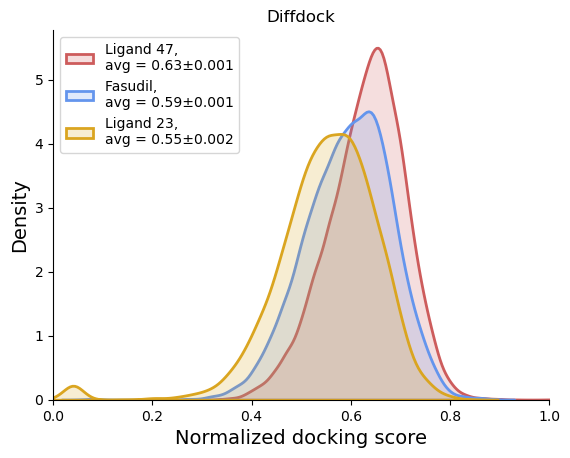

In [16]:
# DIFFDOCK
import seaborn as sns
import matplotlib.pyplot as plt

fas = docking_scores['DD']['41on41bf'].flatten()
lig47 = docking_scores['DD']['47on47bf'].flatten()
lig23 = np.concatenate(docking_scores['DD']['23on23bf'])

comb_max = np.max([np.max(x) for x in [fas, lig47, lig23]])
comb_min = np.min([np.min(x) for x in [fas, lig47, lig23]])

norm_fas = min_max_norm(fas, comb_min, comb_max)
norm_uncert_fas = uncertainties['DD']['41on41bf']/(comb_max-comb_min)

print("fasudil:")
print(f' stdev = {norm_fas.std()}')
print(f' sterr = {std_err(norm_fas)}')
print(f' uncert = {norm_uncert_fas[0]}')

norm_lig47 = min_max_norm(lig47, comb_min, comb_max)
norm_uncert_47 = uncertainties['DD']['47on47bf']/(comb_max-comb_min)

print("ligand 47:")
print(f' stdev = {norm_lig47.std()}')
print(f' sterr = {std_err(norm_lig47)}')
print(f' uncert = {norm_uncert_47[0]}')

norm_lig23 = min_max_norm(lig23, comb_min, comb_max)
norm_uncert_23 = uncertainties['DD']['23on23bf']/(comb_max-comb_min)

print("ligand 23:")
print(f' stdev = {norm_lig23.std()}')
print(f' sterr = {std_err(norm_lig23)}')
print(f' uncert = {norm_uncert_23[0]}')

plt.figure()
sns.kdeplot(norm_lig47.flatten(), color='indianred',  fill=True, alpha=0.2, lw=2,  
            label=f'Ligand 47, \navg = {np.mean(norm_lig47):.2f}±{norm_uncert_47[0]:.3f}') #, RMSD<3 ang = {return_lim_count(ad.flatten(), 3)}')
sns.kdeplot(norm_fas.flatten(), color='cornflowerblue', fill=True, alpha=0.2, lw=2, 
            label=f'Fasudil, \navg = {np.mean(norm_fas):.2f}±{norm_uncert_fas[0]:.3f}')#, RMSD<3 ang = {return_lim_count(dd.flatten(), 3)}')
sns.kdeplot(norm_lig23, color='goldenrod', fill=True, alpha=0.2, lw=2, 
            label=f'Ligand 23, \navg = {np.mean(norm_lig23):.2f}±{norm_uncert_23[0]:.3f}')#, RMSD<3 ang = {return_lim_count(dd.flatten(), 3)}')

plt.title('Diffdock')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel("Density", fontsize=14)
plt.xlabel('Normalized docking score', fontsize=14)
plt.xlim([0, 1])
#plt.ylim([0, 0.07])
plt.legend(loc='upper left')
plt.savefig(f'/Users/anjalidhar/Desktop/score_DD.png', dpi=300, bbox_inches='tight')

/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


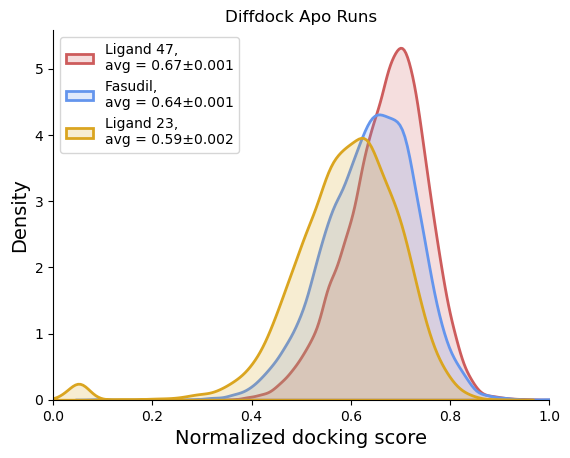

In [45]:
# DIFFDOCK
import seaborn as sns
import matplotlib.pyplot as plt

fas = docking_scores['DD']['41onapo'].flatten()
lig47 = docking_scores['DD']['47onapo'].flatten()
lig23 = np.concatenate(docking_scores['DD']['23onapo'])

comb_max = np.max([np.max(x) for x in [fas, lig47, lig23]])
comb_min = np.min([np.min(x) for x in [fas, lig47, lig23]])

norm_fas = min_max_norm(fas, comb_min, comb_max)
norm_uncert_fas = uncertainties['DD']['41onapo']/(comb_max-comb_min)
norm_lig47 = min_max_norm(lig47, comb_min, comb_max)
norm_uncert_47 = uncertainties['DD']['47onapo']/(comb_max-comb_min)
norm_lig23 = min_max_norm(lig23, comb_min, comb_max)
norm_uncert_23 = uncertainties['DD']['23onapo']/(comb_max-comb_min)

plt.figure()
sns.kdeplot(norm_lig47.flatten(), color='indianred',  fill=True, alpha=0.2, lw=2,  
            label=f'Ligand 47, \navg = {np.mean(norm_lig47):.2f}±{norm_uncert_47[0]:.3f}') #, RMSD<3 ang = {return_lim_count(ad.flatten(), 3)}')
sns.kdeplot(norm_fas.flatten(), color='cornflowerblue', fill=True, alpha=0.2, lw=2, 
            label=f'Fasudil, \navg = {np.mean(norm_fas):.2f}±{norm_uncert_fas[0]:.3f}')#, RMSD<3 ang = {return_lim_count(dd.flatten(), 3)}')
sns.kdeplot(norm_lig23, color='goldenrod', fill=True, alpha=0.2, lw=2, 
            label=f'Ligand 23, \navg = {np.mean(norm_lig23):.2f}±{norm_uncert_23[0]:.3f}')#, RMSD<3 ang = {return_lim_count(dd.flatten(), 3)}')

plt.title('Diffdock Apo Runs')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel("Density", fontsize=14)
plt.xlabel('Normalized docking score', fontsize=14)
plt.xlim([0, 1])
#plt.ylim([0, 0.07])
plt.legend(loc='upper left')
plt.savefig(f'/Users/anjalidhar/Desktop/score_DD_apo.png', dpi=300, bbox_inches='tight')

### Uncertainties ###

In [15]:
import scipy.stats as stats
def ci(x, iv:float=0.95):
    
    l,r = stats.t.interval(confidence=iv,df = len(x)-1, loc = 0, scale=stats.sem(x))
    return (abs(l)+abs(r))/2

def boot_ci(x,iv=.95,n_resamples=10000,fxn=np.mean, axis=0):
    mean = fxn(x)
    x = (x,)
    l,r = stats.bootstrap(data=x,statistic=fxn,confidence_level = iv,n_resamples=n_resamples,
                           method="percentile",vectorized=True,axis=axis).confidence_interval
    l,r = [i-mean for i in [l,r]]
    return (abs(l)+abs(r))/2

In [16]:
uncertainties = {}
programs = ['AD', 'DD']
runs = ['47on47bf', '41on41bf', '23on23bf', '47onapo', '41onapo', '23onapo']

for pr in programs: 
    uncertainties[pr] ={}
    for run in runs: 
        scores = np.concatenate([x for x in docking_scores[pr][run]]) # all scores  
        uncertainties[pr][run] = np.array([boot_ci(scores, iv=.95, n_resamples=10000, 
                                                   fxn=np.mean, axis=0)]) # one value for each run     

### APO vs HOLO ###

/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


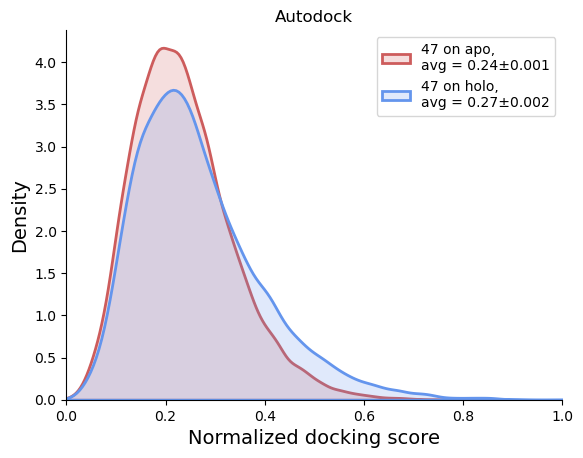

In [37]:
# AUTODOCK VINA
import seaborn as sns
import matplotlib.pyplot as plt

apo = -docking_scores['AD']['47onapo'].flatten()
holo = -docking_scores['AD']['47on47bf'].flatten()

comb_max = np.max([apo, holo])
comb_min = np.min([apo, holo])

clip_min = 0
clip_max = 9

# Clip the values
comb_min = np.clip(comb_min, clip_min, clip_max)
comb_max = np.clip(comb_max, clip_min, clip_max)

norm_apo = min_max_norm(apo, comb_min, comb_max)
norm_holo = min_max_norm(holo, comb_min, comb_max)

norm_uncert_apo= uncertainties['AD']['47onapo']/(comb_max-comb_min)
norm_uncert_holo = uncertainties['AD']['47on47bf']/(comb_max-comb_min)


plt.figure()
sns.kdeplot(norm_apo.flatten(), color='indianred',  fill=True, alpha=0.2, lw=2,  
            label=f'47 on apo, \navg = {np.mean(norm_apo):.2f}±{norm_uncert_apo[0]:.3f}') 
sns.kdeplot(norm_holo.flatten(), color='cornflowerblue', fill=True, alpha=0.2, lw=2, 
            label=f'47 on holo, \navg = {np.mean(norm_holo):.2f}±{norm_uncert_holo[0]:.3f}')

plt.title('Autodock')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel("Density", fontsize=14)
plt.xlabel('Normalized docking score', fontsize=14)
plt.xlim([0, 1])
#plt.ylim([0, 0.07])
plt.legend()
plt.savefig(f'/Users/anjalidhar/Desktop/score_AD47_apovholo.png', dpi=300, bbox_inches='tight')

/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


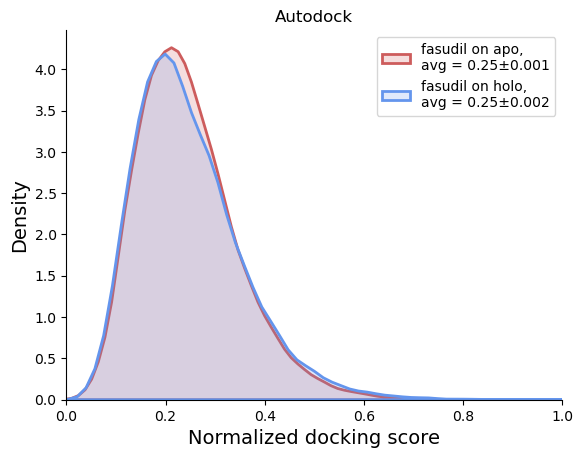

In [38]:
# AUTODOCK VINA
import seaborn as sns
import matplotlib.pyplot as plt

apo = -docking_scores['AD']['41onapo'].flatten()
holo = -docking_scores['AD']['41on41bf'].flatten()

comb_max = np.max([apo, holo])
comb_min = np.min([apo, holo])

clip_min = 0
clip_max = 9

# Clip the values
comb_min = np.clip(comb_min, clip_min, clip_max)
comb_max = np.clip(comb_max, clip_min, clip_max)

norm_apo = min_max_norm(apo, comb_min, comb_max)
norm_holo = min_max_norm(holo, comb_min, comb_max)

norm_uncert_apo= uncertainties['AD']['41onapo']/(comb_max-comb_min)
norm_uncert_holo = uncertainties['AD']['41on41bf']/(comb_max-comb_min)


plt.figure()
sns.kdeplot(norm_apo.flatten(), color='indianred',  fill=True, alpha=0.2, lw=2,  
            label=f'fasudil on apo, \navg = {np.mean(norm_apo):.2f}±{norm_uncert_apo[0]:.3f}') 
sns.kdeplot(norm_holo.flatten(), color='cornflowerblue', fill=True, alpha=0.2, lw=2, 
            label=f'fasudil on holo, \navg = {np.mean(norm_holo):.2f}±{norm_uncert_holo[0]:.3f}')

plt.title('Autodock')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel("Density", fontsize=14)
plt.xlabel('Normalized docking score', fontsize=14)
plt.xlim([0, 1])
#plt.ylim([0, 0.07])
plt.legend()
plt.savefig(f'/Users/anjalidhar/Desktop/score_AD41_apovholo.png', dpi=300, bbox_inches='tight')

/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


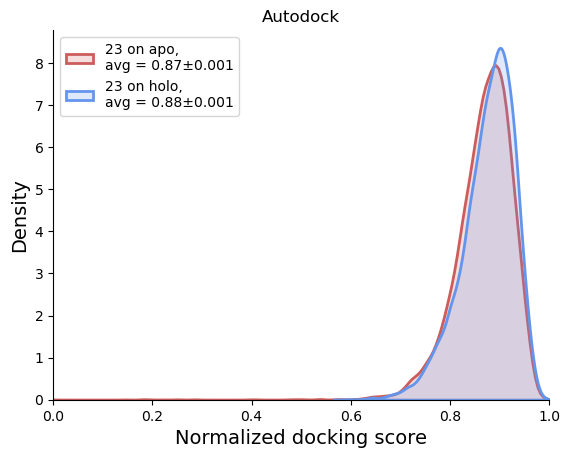

In [39]:
# AUTODOCK VINA
import seaborn as sns
import matplotlib.pyplot as plt

apo = np.concatenate(docking_scores['AD']['23onapo'])
holo = np.concatenate(docking_scores['AD']['23on23bf'])

comb_max = np.max([np.max(x) for x in [apo,holo]])
comb_min = np.min([np.min(x) for x in [apo,holo]])


# Clip the values


norm_apo = min_max_norm(apo, comb_min, comb_max)
norm_holo = min_max_norm(holo, comb_min, comb_max)

norm_uncert_apo= uncertainties['AD']['23onapo']/(comb_max-comb_min)
norm_uncert_holo = uncertainties['AD']['23on23bf']/(comb_max-comb_min)


plt.figure()
sns.kdeplot(norm_apo.flatten(), color='indianred',  fill=True, alpha=0.2, lw=2,  
            label=f'23 on apo, \navg = {np.mean(norm_apo):.2f}±{norm_uncert_apo[0]:.3f}') 
sns.kdeplot(norm_holo.flatten(), color='cornflowerblue', fill=True, alpha=0.2, lw=2, 
            label=f'23 on holo, \navg = {np.mean(norm_holo):.2f}±{norm_uncert_holo[0]:.3f}')

plt.title('Autodock')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel("Density", fontsize=14)
plt.xlabel('Normalized docking score', fontsize=14)
plt.xlim([0, 1])
#plt.ylim([0, 0.07])
plt.legend(loc='upper left')
plt.savefig(f'/Users/anjalidhar/Desktop/score_AD23_apovholo.png', dpi=300, bbox_inches='tight')

/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


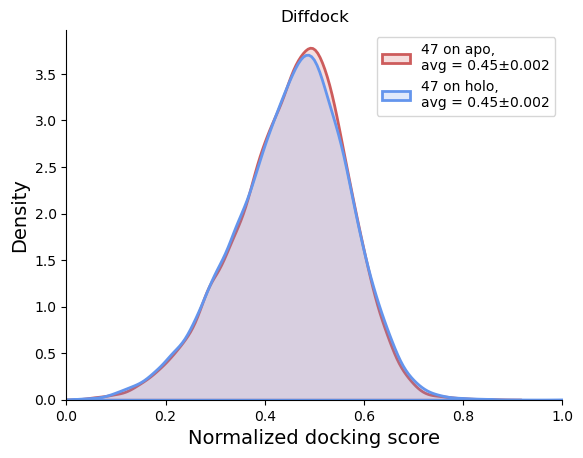

In [40]:
# AUTODOCK VINA
import seaborn as sns
import matplotlib.pyplot as plt

apo = docking_scores['DD']['47onapo'].flatten()
holo = docking_scores['DD']['47on47bf'].flatten()

comb_max = np.max([apo, holo])
comb_min = np.min([apo, holo])


# Clip the values


norm_apo = min_max_norm(apo, comb_min, comb_max)
norm_holo = min_max_norm(holo, comb_min, comb_max)

norm_uncert_apo= uncertainties['DD']['47onapo']/(comb_max-comb_min)
norm_uncert_holo = uncertainties['DD']['47on47bf']/(comb_max-comb_min)


plt.figure()
sns.kdeplot(norm_apo.flatten(), color='indianred',  fill=True, alpha=0.2, lw=2,  
            label=f'47 on apo, \navg = {np.mean(norm_apo):.2f}±{norm_uncert_apo[0]:.3f}') 
sns.kdeplot(norm_holo.flatten(), color='cornflowerblue', fill=True, alpha=0.2, lw=2, 
            label=f'47 on holo, \navg = {np.mean(norm_holo):.2f}±{norm_uncert_holo[0]:.3f}')

plt.title('Diffdock')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel("Density", fontsize=14)
plt.xlabel('Normalized docking score', fontsize=14)
plt.xlim([0, 1])
#plt.ylim([0, 0.07])
plt.legend()
plt.savefig(f'/Users/anjalidhar/Desktop/score_DD47_apovholo.png', dpi=300, bbox_inches='tight')

/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


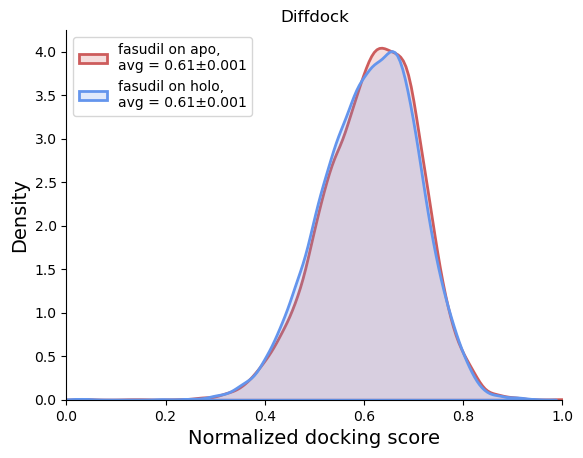

In [41]:
# AUTODOCK VINA
import seaborn as sns
import matplotlib.pyplot as plt

apo = docking_scores['DD']['41onapo'].flatten()
holo = docking_scores['DD']['41on41bf'].flatten()

comb_max = np.max([apo, holo])
comb_min = np.min([apo, holo])


# Clip the values


norm_apo = min_max_norm(apo, comb_min, comb_max)
norm_holo = min_max_norm(holo, comb_min, comb_max)

norm_uncert_apo= uncertainties['DD']['41onapo']/(comb_max-comb_min)
norm_uncert_holo = uncertainties['DD']['41on41bf']/(comb_max-comb_min)


plt.figure()
sns.kdeplot(norm_apo.flatten(), color='indianred',  fill=True, alpha=0.2, lw=2,  
            label=f'fasudil on apo, \navg = {np.mean(norm_apo):.2f}±{norm_uncert_apo[0]:.3f}') 
sns.kdeplot(norm_holo.flatten(), color='cornflowerblue', fill=True, alpha=0.2, lw=2, 
            label=f'fasudil on holo, \navg = {np.mean(norm_holo):.2f}±{norm_uncert_holo[0]:.3f}')

plt.title('Diffdock')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel("Density", fontsize=14)
plt.xlabel('Normalized docking score', fontsize=14)
plt.xlim([0, 1])
#plt.ylim([0, 0.07])
plt.legend(loc='upper left')
plt.savefig(f'/Users/anjalidhar/Desktop/score_DD41_apovholo.png', dpi=300, bbox_inches='tight')

/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


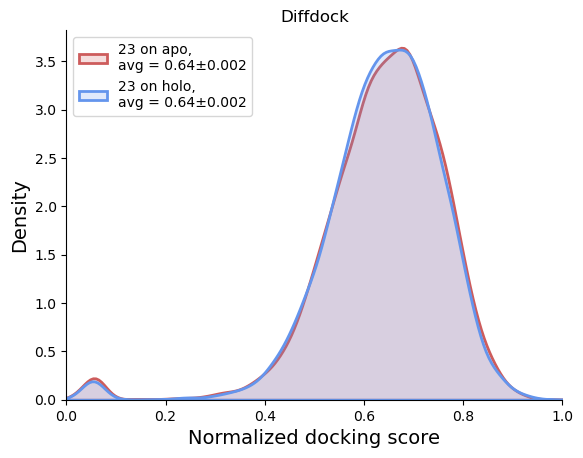

In [42]:
# AUTODOCK VINA
import seaborn as sns
import matplotlib.pyplot as plt

apo = np.concatenate(docking_scores['DD']['23onapo'])
holo = np.concatenate(docking_scores['DD']['23on23bf'])

comb_max = np.max([np.max(x) for x in [apo,holo]])
comb_min = np.min([np.min(x) for x in [apo,holo]])


# Clip the values


norm_apo = min_max_norm(apo, comb_min, comb_max)
norm_holo = min_max_norm(holo, comb_min, comb_max)

norm_uncert_apo= uncertainties['DD']['23onapo']/(comb_max-comb_min)
norm_uncert_holo = uncertainties['DD']['23on23bf']/(comb_max-comb_min)


plt.figure()
sns.kdeplot(norm_apo.flatten(), color='indianred',  fill=True, alpha=0.2, lw=2,  
            label=f'23 on apo, \navg = {np.mean(norm_apo):.2f}±{norm_uncert_apo[0]:.3f}') 
sns.kdeplot(norm_holo.flatten(), color='cornflowerblue', fill=True, alpha=0.2, lw=2, 
            label=f'23 on holo, \navg = {np.mean(norm_holo):.2f}±{norm_uncert_holo[0]:.3f}')

plt.title('Diffdock')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel("Density", fontsize=14)
plt.xlabel('Normalized docking score', fontsize=14)
plt.xlim([0, 1])
#plt.ylim([0, 0.07])
plt.legend(loc='upper left')
plt.savefig(f'/Users/anjalidhar/Desktop/score_DD23_apovholo.png', dpi=300, bbox_inches='tight')